In [14]:
#Created on Sun Jul 28
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import random
#read the data
df = pd.read_csv('/Users/li/Desktop/python/ML_with_python/iris.data', header=None)
#Data preprocessing
o1=df.iloc[:,4].unique()#there are three categories
df=df[df.iloc[:,4]!='Iris-virginica']
df.loc[df.iloc[:,4]=='Iris-setosa',4]=1
df.loc[df.iloc[:,4]=='Iris-versicolor',4]=-1

X=np.array(df.iloc[:,[0,2]])
y=np.array(df.iloc[:,4]).reshape((-1,1))

#build the algorithm
def Adaline(X,y,eta): ##X and y are numpy matrix, y includs binary label
#page 57 in the book: Python Machine learning, Second edition
    L1,L2=np.shape(X)
    X=np.hstack((np.ones((L1,1)),X))
    w=np.random.random_sample(size = L2+1).reshape((1,-1))
    iteration_number=0
    error=[]
    while iteration_number<500:
        y_hat=np.matmul(X,w.T)
        error.append(0.5*sum((y-y_hat)**2)[0])        
        a=np.matlib.repmat(y-y_hat,1,L2+1)
        aa=a*X
        w1=eta*aa.sum(axis=0).reshape((1,-1))
        w=w+w1
        iteration_number=iteration_number+1  
        if error[0]<0.001:
            break
    return w,error #w is numpy matrix 
w,error=Adaline(X,y,0.0001) 
w=w[0].copy() 

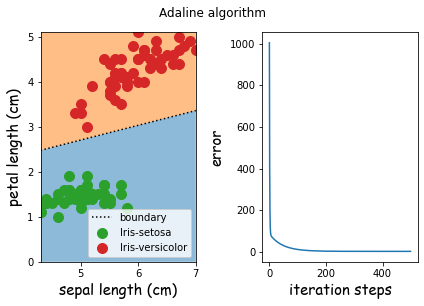

In [15]:
#plot the figure
fig, axes = plt.subplots(nrows=2, ncols=2) 
plt.subplot(1, 2, 1)
df1=df[df.iloc[:,4]==1]
xx=df.iloc[:,0]
xx=np.arange(min(xx),max(xx)+0.1,0.1)
plt.plot(xx,-(w[0]+w[1]*xx)/w[2],'k:',label='boundary')
plt.fill_between(xx,-(w[0]+w[1]*xx)/w[2],alpha=0.5)
plt.fill_between(xx,-(w[0]+w[1]*xx)/w[2],df.iloc[:,2].max(),alpha=0.5)
plt.scatter(df1.iloc[:,0],df1.iloc[:,2],s=100,label='Iris-setosa')
df1=df[df.iloc[:,4]==-1]
plt.scatter(df1.iloc[:,0],df1.iloc[:,2],s=100,label='Iris-versicolor')
plt.xlabel('sepal length (cm)',fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.ylabel('petal length (cm)',fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.legend()
plt.autoscale(enable=True, axis='both', tight=True)#axis tight

plt.subplot(1, 2, 2) 
plt.plot(error,)
plt.xlabel('iteration steps',fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.ylabel('error',fontdict={'fontname':'Comic Sans MS','fontsize':15})
fig.tight_layout()
fig.suptitle('Adaline algorithm',y=1.05)
plt.show()

I find this algorithm is sensitive to the learning rate (eta) and iteration number.